In [2]:
library(Seurat)

# plotting and data science packages
library(tidyverse)
library(cowplot)
library(patchwork)

# co-expression network analysis packages:
library(WGCNA)
library(scWGCNA)

library(harmony)

# using the cowplot theme for ggplot
theme_set(theme_cowplot())

# network analysis & visualization package:
library(igraph)

# gene enrichment packages
library(enrichR)
library(GeneOverlap)

# using the cowplot theme for ggplot
theme_set(theme_cowplot())

# set random seed for reproducibility
set.seed(12345)


Attaching SeuratObject

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor


Loading required package: Rcpp


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:p

In [13]:
MPOA.integrated <-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)

In [14]:
MPOA.integrated@meta.data$celltype<-Idents(MPOA.integrated)

In [15]:
#if you like to subset data
Celltype<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20")
subsetcell<-rownames(MPOA.integrated@meta.data[(MPOA.integrated@meta.data$celltype %in% Celltype) & (MPOA.integrated@meta.data$stim %in% c("AM")),])

In [16]:
#if you like to subset data
MPOA.integrated<-subset(MPOA.integrated,cells=subsetcell)

In [18]:
seurat_obj<-MPOA.integrated

In [19]:
Celltype<-numeric()
for(i in 1:dim(seurat_obj@meta.data)[1]){
    if(seurat_obj@meta.data$celltype[i] %in% c("Vgat2","Vgat4","Vgat16")){
        Celltype[i]<-"VgatEsr1_p"
    }else{Celltype[i]<-"VgatEsr1_n"}
}
seurat_obj@meta.data$Celltype<-Celltype

In [20]:
seurat_obj<-FindVariableFeatures(seurat_obj,nfeatures = 4000)

In [21]:
seurat_obj <- SetupForWGCNA(
  seurat_obj,
  gene_select = "variable", # the gene selection approach
  fraction = 0.05, # fraction of cells that a gene needs to be expressed in order to be included
  wgcna_name = "tutorial" # the name of the scWGCNA experiment
)

In [22]:
# construct metacells  in each group
seurat_obj <- MetacellsByGroups(
  seurat_obj = seurat_obj,
  group.by = c("celltype","Celltype"), # specify the columns in seurat_obj@meta.data to group by c("celltype","stim")
  k = 25, # nearest-neighbors parameter
  ident.group = 'celltype' # set the Idents of the metacell seurat object
)

# normalize metacell expression matrix:
seurat_obj <- NormalizeMetacells(seurat_obj)

 [1] "Vgat1#VgatEsr1_n"  "Vgat10#VgatEsr1_n" "Vgat11#VgatEsr1_n"
 [4] "Vgat12#VgatEsr1_n" "Vgat13#VgatEsr1_n" "Vgat15#VgatEsr1_n"
 [7] "Vgat16#VgatEsr1_p" "Vgat18#VgatEsr1_n" "Vgat2#VgatEsr1_p" 
[10] "Vgat3#VgatEsr1_n"  "Vgat4#VgatEsr1_p"  "Vgat5#VgatEsr1_n" 
[13] "Vgat6#VgatEsr1_n"  "Vgat7#VgatEsr1_n"  "Vgat8#VgatEsr1_n" 
[16] "Vgat9#VgatEsr1_n" 
[[1]]
    celltype     Celltype 
     "Vgat1" "VgatEsr1_n" 

[[2]]
    celltype     Celltype 
    "Vgat10" "VgatEsr1_n" 

[[3]]
    celltype     Celltype 
    "Vgat11" "VgatEsr1_n" 

[[4]]
    celltype     Celltype 
    "Vgat12" "VgatEsr1_n" 

[[5]]
    celltype     Celltype 
    "Vgat13" "VgatEsr1_n" 

[[6]]
    celltype     Celltype 
    "Vgat15" "VgatEsr1_n" 

[[7]]
    celltype     Celltype 
    "Vgat16" "VgatEsr1_p" 

[[8]]
    celltype     Celltype 
    "Vgat18" "VgatEsr1_n" 

[[9]]
    celltype     Celltype 
     "Vgat2" "VgatEsr1_p" 

[[10]]
    celltype     Celltype 
     "Vgat3" "VgatEsr1_n" 

[[11]]
    celltype     Celltype 
     

Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 6.34343434343434
Median shared cells bin-bin: 4

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
     "Vgat1" "VgatEsr1_n" 
[1] "celltype" "Celltype"
[1] 20345   107


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 6.2046783625731
Median shared cells bin-bin: 3

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
    "Vgat10" "VgatEsr1_n" 
[1] "celltype" "Celltype"
[1] 20345   129


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 5.27979797979798
Median shared cells bin-bin: 2

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
    "Vgat11" "VgatEsr1_n" 
[1] "celltype" "Celltype"
[1] 20345    94


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 6.7883064516129
Median shared cells bin-bin: 5

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
    "Vgat12" "VgatEsr1_n" 
[1] "celltype" "Celltype"
[1] 20345    72


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 10.3949275362319
Median shared cells bin-bin: 10.5

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
    "Vgat13" "VgatEsr1_n" 
[1] "celltype" "Celltype"
[1] 20345    79


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 8.4093567251462
Median shared cells bin-bin: 8

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
    "Vgat15" "VgatEsr1_n" 
[1] "celltype" "Celltype"
[1] 20345    52


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 14.6282051282051
Median shared cells bin-bin: 15

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
    "Vgat16" "VgatEsr1_p" 
[1] "celltype" "Celltype"
[1] 20345    57


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 10.3333333333333
Median shared cells bin-bin: 10

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
    "Vgat18" "VgatEsr1_n" 
[1] "celltype" "Celltype"
[1] 20345   105


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 6.62692307692308
Median shared cells bin-bin: 5

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
     "Vgat2" "VgatEsr1_p" 
[1] "celltype" "Celltype"
[1] 20345   110


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 6.6551724137931
Median shared cells bin-bin: 4

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
     "Vgat3" "VgatEsr1_n" 
[1] "celltype" "Celltype"
[1] 20345    78


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 9.21428571428571
Median shared cells bin-bin: 9

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
     "Vgat4" "VgatEsr1_p" 
[1] "celltype" "Celltype"
[1] 20345   106


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 7.45454545454545
Median shared cells bin-bin: 6

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
     "Vgat5" "VgatEsr1_n" 
[1] "celltype" "Celltype"
[1] 20345    97


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 6.88744588744589
Median shared cells bin-bin: 5

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
     "Vgat6" "VgatEsr1_n" 
[1] "celltype" "Celltype"
[1] 20345   141


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 5.48615384615385
Median shared cells bin-bin: 0

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
     "Vgat7" "VgatEsr1_n" 
[1] "celltype" "Celltype"
[1] 20345   138


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 5.18734335839599
Median shared cells bin-bin: 1

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
     "Vgat8" "VgatEsr1_n" 
[1] "celltype" "Celltype"
[1] 20345   157


Overlap QC metrics:
Cells per bin: 25
Maximum shared cells bin-bin: 22
Mean shared cells bin-bin: 5.33414634146341
Median shared cells bin-bin: 2

Warning message in (function (seurat_obj, name = "agg", ident.group = "seurat_clusters", :
“On average, more than 10% of cells are shared between paired bins.”


[1] "here"
    celltype     Celltype 
     "Vgat9" "VgatEsr1_n" 
[1] "celltype" "Celltype"


In [23]:
metacell_obj <- GetMetacellObject(seurat_obj)

In [24]:
seurat_obj <- SetDatExpr(
  seurat_obj,
  group.by='Celltype', #using stim since only one group the metadata column containing the cell type info. This same column should have also been used in MetacellsByGroups
  group_name = "VgatEsr1_p", # the name of the group of interest in the group.by column
  use_metacells=TRUE,
  slot = 'data'
)

[1] "n_genes:"
[1] 4000
[1] "Avp"     "Slc5a7"  "Ngfr"    "Slc10a4" "Penk"    "Vip"    
[1] 463   5
[1] 74  5
[1] 74  5
[1] "cells:"
[1] "Vgat16#VgatEsr1_p_1" "Vgat16#VgatEsr1_p_2" "Vgat16#VgatEsr1_p_3"
[4] "Vgat16#VgatEsr1_p_4" "Vgat16#VgatEsr1_p_5" "Vgat16#VgatEsr1_p_6"
[1] 74
  ..Excluding 213 genes from the calculation due to too many missing samples or zero variance.
[1]   74 3787


pickSoftThreshold: will use block size 3787.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 3787 of 3787


Warning message:
“executing %dopar% sequentially: no parallel backend registered”
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”
Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


   Power SFT.R.sq slope truncated.R.sq mean.k. median.k. max.k.
1      1    0.350  4.49          0.831 1920.00  1930.000 2100.0
2      2    0.529 -3.69          0.649 1080.00  1050.000 1370.0
3      3    0.477 -2.69          0.705  657.00   625.000  989.0
4      4    0.487 -2.07          0.778  425.00   397.000  755.0
5      5    0.519 -1.77          0.840  288.00   265.000  599.0
6      6    0.590 -1.66          0.879  203.00   182.000  489.0
7      7    0.652 -1.67          0.907  148.00   129.000  407.0
8      8    0.718 -1.68          0.933  110.00    93.000  345.0
9      9    0.769 -1.68          0.950   84.10    68.400  296.0
10    10    0.806 -1.70          0.960   65.50    51.000  257.0
11    12    0.867 -1.71          0.977   41.70    29.800  199.0
12    14    0.893 -1.71          0.980   28.00    18.200  158.0
13    16    0.905 -1.71          0.972   19.60    11.700  128.0
14    18    0.915 -1.68          0.970   14.30     7.840  106.0
15    20    0.924 -1.65          0.969  

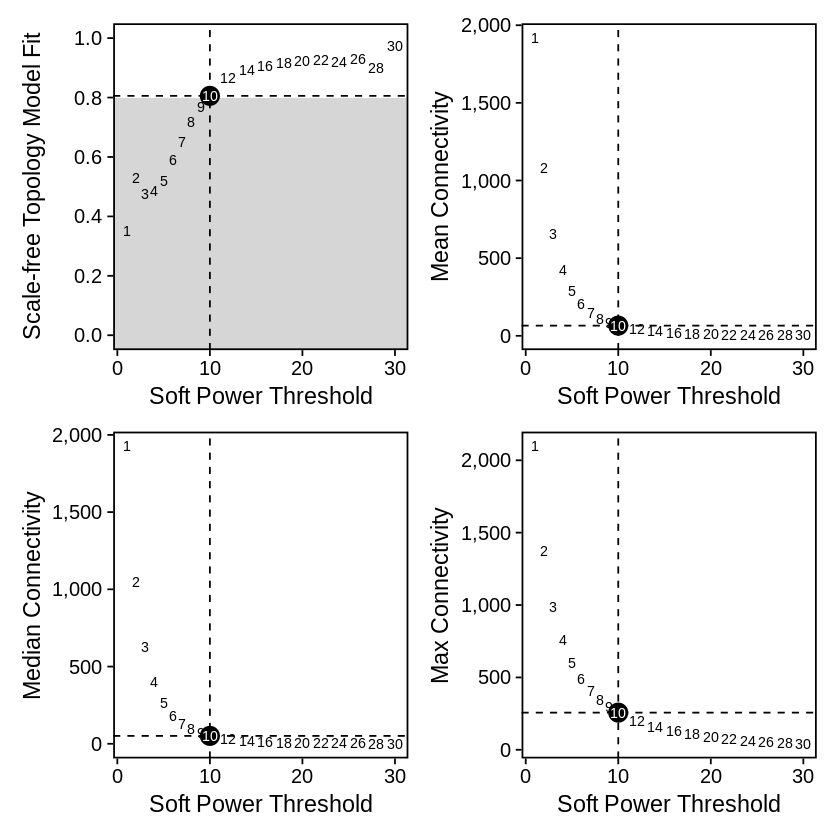

In [25]:
# Test different soft powers:
seurat_obj <- TestSoftPowers(
  seurat_obj,
  setDatExpr = FALSE, # set this to FALSE since we did this above
)

# plot the results:
plot_list <- PlotSoftPowers(seurat_obj)

# assemble with patchwork
wrap_plots(plot_list, ncol=2)

In [26]:
power_table <- GetPowerTable(seurat_obj)
head(power_table)

,Power,SFT.R.sq,slope,truncated.R.sq,mean.k.,median.k.,max.k.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.3502748,4.494964,0.8309111,1917.0227,1925.0419,2095.3232
2,2,0.5291834,-3.694266,0.6492375,1079.0198,1048.9239,1372.6217
3,3,0.4765704,-2.692984,0.7052467,656.9118,624.7730,989.3512
4,4,0.4868238,-2.073463,0.7782010,424.7914,397.4670,755.1813
5,5,0.5187241,-1.774994,0.8397567,288.0654,265.4434,599.0875
6,6,0.5899925,-1.662459,0.8794306,202.9750,181.7343,488.6245


In [27]:
# construct co-expression network:
seurat_obj <- ConstructNetwork(
  seurat_obj, soft_power=10,
  setDatExpr=FALSE
)

 Calculating consensus modules and module eigengenes block-wise from all genes
 Calculating topological overlaps block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
 ..Working on block 1 .
 ..Working on block 1 .
 ..merging consensus modules that are too close..


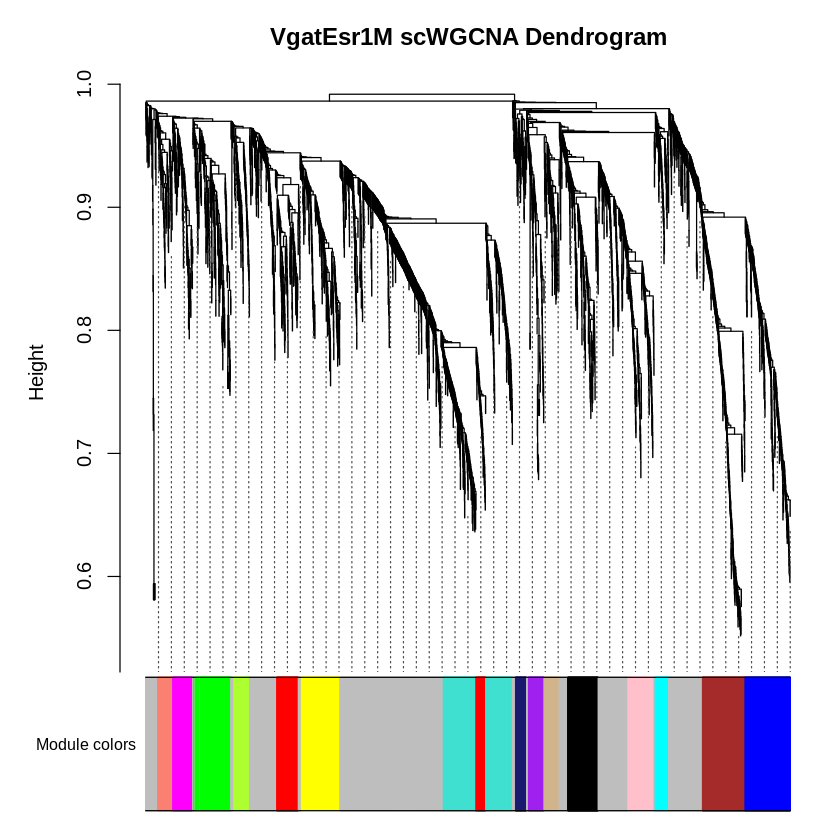

In [28]:
PlotDendrogram(seurat_obj, main='VgatEsr1M scWGCNA Dendrogram')

In [29]:
# expression matrix for all the WGCNA genes:
seurat_obj <- Seurat::ScaleData(
 seurat_obj,
 features = GetWGCNAGenes(seurat_obj)
)

# compute all MEs in the full single-cell dataset
seurat_obj <- ModuleEigengenes(
 seurat_obj)
#, group.by.vars="stim") # no batch

Centering and scaling data matrix



[1] "blue"


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcablue to pcablue_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcablue_”
pcablue_ 1 
Positive:  Nos1, Shisa6, Marcks, Prkacb, Rpl36, Rplp1, Sh3gl2, Rgs4, Syndig1l, Fbn2 
	   Pip4k2a, Phyhip, Tpt1, Lamb3, Rbms3, Bola2, Tmem35a, Spon1, Mrap2, Smap1 
	   Cckar, Gpx3, Btbd11, Tcea3, Fgf12, Ivns1abp, Neto2, Fam107a, Klhl13, Bnip3 
Negative:  Gm15261, Gm26798, Pmaip1, Drd1, Gm12027, Nsun6, BC030343, Zfp536, Slit2, Sema3c 
	   9630001P10Rik, Vipr2, Ammecr1, Myb, Sfrp1, Mxra8, Atf7, Fam117a, Me3, 4930426D05Rik 
	   Kitl, Grap2, Kcnh7, Dab2, Ppfibp2, St8sia6, Lrrc24, Sfrp2, Mis18bp1, Ptcra 
pcablue_ 2 
Positive:  Rpl36, Rplp1, Tpt1, Prkacb, Bola2, Marcks, Pmaip1, Nsa2, Eif1a, Sh3gl2 
	   Dlx6, Gm2000, Prkca, Bnip3, Phyhip, Fdx1, Klhl13, Smap1, Mfhas1, Rgs4 
	   Tlk2, Fgf12, Jade2, Elavl2, Btbd9, Med30, Gadd4

[1] "grey"


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagrey to pcagrey_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcagrey_”
pcagrey_ 1 
Positive:  Actg1, Cox7c, Mapk1, Ppp2ca, Tcf25, Map1b, Syn1, Tuba1b, Dpysl2, Ptp4a2 
	   Vat1, Tubb3, 6330403K07Rik, Pitpna, Ddx3x, Pgk1, Mapre2, Ap2b1, Ube2m, Efhd2 
	   Eef1a2, Dnm3, Chchd10, Ubqln2, Gnb1, Hsph1, Nckap1, Hdac11, Nefl, Vapa 
Negative:  4430402I18Rik, Ncam1, Fxyd4, Hpgds, Fyco1, Znrf3, 1810032O08Rik, Moxd1, Cd27, Tekt2 
	   Cntn5, Atp2c1, Gm40841, C730034F03Rik, Xlr3b, 5930430L01Rik, Miip, Cyp2u1, Pip5kl1, Gpc6 
	   Khdrbs2, Slc35b2, Magt1, Lrfn5, Cryab, Iqcj, Hist1h4d, Fdps, A430106G13Rik, Fam184b 
pcagrey_ 2 
Positive:  Cox7c, 6330403K07Rik, Vat1, Hpcal1, 1500009L16Rik, Gda, Pdcd4, Hpcal4, Eif1b, Ar 
	   Cbx3, Dlx2, Dpysl2, Camk2a, Calb1, Gnai2, 2010005H15Rik, Fndc9, Ubqln2, Gabre 
	   Zfp92, Gnb1,

[1] "brown"


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcabrown to pcabrown_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcabrown_”
pcabrown_ 1 
Positive:  Rps19, Rps23, Rpl35a, Rpl37, Rps27, Rps27a, Rpl26, Rpl14, Rpl32, Rpl37a 
	   Rps3a1, Rps16, Rpl3, Rps29, Rps6, Rpl9, Rps8, Rps14, Rps25, Rps21 
	   Rps28, Rps15a, Rpl21, Rpl41, Rpl34, Rpl22l1, Rps24, Rps18, Rpl17, Rps7 
Negative:  Adarb2, Kdelr2, Pcsk1n, Rgl2, Gm11713, Tmem178, Slitrk1, Dock10, Sema6a, Nebl 
	   Penk, March1, Nfam1, Gm3294, Kctd4, Cntn4, Tmtc2, Olfm3, Nrp1, Slc7a5 
	   Gm17435, 4930447C04Rik, Lrrn3, Pard3b, Acads, Lrrn1, B3galt1, Pcdh9, BC017158, Gm28905 
pcabrown_ 2 
Positive:  Mef2c, Eif4a2, Rpl22l1, Rps29, Rpl21, Mpped2, Rps25, Rps27, Tmem176b, Rpl10 
	   Rpl9, Rps27a, Rpl17, Rps11, Rpl34, Megf11, Rpl24, Rps6, Rpl35a, Rps8 
	   Rpl23, Rpl23a, Rpl14, Rpl3, Scn9a, Cntn4, Rpl37a, Rps2

[1] "red"


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcared to pcared_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcared_”
pcared_ 1 
Positive:  Brinp3, Lsamp, 2900055J20Rik, Grid2, Adra1b, Trpc4, Nxph1, Pam, Gabra2, Bcan 
	   Ndor1, Robo2, Car12, Lgi1, Kcnn2, Qsox2, Sdc2, Sorcs1, H13, Sparcl1 
	   Slc38a10, Adcy2, Arpp21, Ryr3, Fam43a, Ntng1, Tnnc1, Cpne6, Nkain2, Slc22a23 
Negative:  Ywhab, Basp1, Ywhah, Gabarapl1, Zwint, Dynll2, Gap43, Ahi1, Clip3, Tmsb10 
	   Flywch1, Snap25, Gad2, Map7d2, Map4, Vsnl1, Camk2n2, Pak3, Rab6b, Rcan2 
	   Vat1l, Snap47, Camk2n1, Gad1, Kifap3, Kif21a, Kif5a, Scrn1, Arhgdia, Rnd2 
pcared_ 2 
Positive:  Chl1, Ntng1, Nts, Crim1, Pdzrn4, Timp2, Pcdh17, Lsamp, Galnt16, Ecel1 
	   Tmem179, Drp2, Slitrk5, Nell1, Ptpro, Vstm2a, Cd83, Sorcs1, Gabra2, Grid2 
	   Tenm2, Ctsd, Rab3c, Brinp3, Cbarp, Fat3, Rspo1, Susd4, Htr7, Rbfox3

[1] "purple"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcapurple to pcapurple_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcapurple_”
pcapurple_ 1 
Positive:  Timmdc1, Lhx1os, Gm44777, Slc25a13, Ndufa4l2, Tcf7l2, Rpp38, Kcng1, Nms, S100a13 
	   Ppp1r1b, Ier2, Fzd8, Gm12500, Htr3a, B230303O12Rik, Tnnt1, Mc4r, Entpd7, Gtf3c4 
	   Tdrd6, Gm26767, Thbs3, Meis2, Asb4, Gm47438, Map3k6, Poc1a, Fosb, Morn5 
Negative:  Nrp2, Ptprz1, Alcam, Gfra2, Sema5a, Galr1, Ctnnb1, Ndst4, Luzp2, Fam19a4 
	   Prex2, Fam174b, Dlx6os1, A830082K12Rik, Slc6a15, A830036E02Rik, Ngef, Sox11, Gm42722, Fam3c 
	   Pde10a, Prlr, Gm20515, Synj2, Meox1, Avpr1a, Neb, Pcdhb18, Sema3e, Suv39h2 
pcapurple_ 2 
Positive:  Asb4, Prlr, Sox11,

[1] "yellow"


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcayellow to pcayellow_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcayellow_”
pcayellow_ 1 
Positive:  Cab39, Phyhipl, Ehd3, Sqstm1, Enc1, Cdk14, Phlda3, Psmc1, Hprt, Dpp6 
	   Tpd52, Adarb1, Tuba1a, Fut9, Camsap2, Dhcr24, Pou3f1, Nceh1, Lhx8, Acat2 
	   Chst2, Klhl1, Capn5, Vgf, Clvs1, Sdcbp, Clcn5, Nwd2, Chrm2, Creg2 
Negative:  Fam19a1, Pcdh15, Ttn, Gpr165, Gm31805, Mt2, Ano1, Arhgap6, Slc1a5, Gm12840 
	   Snai2, Tmem14c, Gm17224, Gm30382, Zfp677, Eno4, Prr5l, Serpinf1, Gm2464.1, 9430041J12Rik 
	   Kiss1r, Eepd1, Slamf1, D930030I03Rik, Cyth4, Gpr88, Rin2, Pcsk5, Ell2, Tnfsf13b 
pcayellow_ 2 
Positive:  Sqstm1, Sdcbp, C530008M17Rik, Ccnb1ip1, Arhgap6, Rtl6, Zfhx2, Setbp1, Camsap2, Tuba1a 
	   Cab39, Ehd3, Hprt, Phyhipl, Lrch3, Enc1, Fam149a, Psmc1, Ccdc71, Lbhd2 
	   Doc2b, Pkd2, Sox13, Vps52, Gm

[1] "pink"


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcapink to pcapink_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcapink_”
pcapink_ 1 
Positive:  Foxp2, Trhde, Lhx6, Ccnd1, Ntn1, Thrsp, Rgma, Lhx2, Serping1, Socs2 
	   Kcnmb2, Zic2, Asah2, Mum1l1, Gm10371, Ano4, Msi2, Egf, Vstm2l, Cdh9 
	   B930036N10Rik, Ccnb1, Cystm1, Cpa4, Ncaph, D830024N08Rik, Rab3b, 4933424G06Rik, Mtbp, A730046J19Rik 
Negative:  Th, Slc18a2, Fam46a, Rxfp3, Chodl, Prox1, Lix1, Shisa2, Stum, Sytl4 
	   Enpp2, Slc7a8, Kcnj3, Tekt1, Ucp2, Frmd6, Mast4, Maf, Itga4, N4bp2 
	   Add3, Per3, Prdx6, Negr1, Syne2, Hmgn2, Cd44, Prox1os, Cacna2d1, Lcorl 
pcapink_ 2 
Positive:  Th, Slc18a2, 1700011I03Rik, Stk32a, Gpld1, Rxfp3, Prox1, Prox1os, Prdx6, Cd44 
	   Gpr179, Itga4, Slc7a8, Fam46a, Lhx2, Rnd3, Kcnj3, Lrrc46, N4bp2, Lrp4 
	   Add3, Hmgn2, Frmd6, Pgf, Cartpt, Tekt1, Nr1d1, Lgals7, Mas

[1] "turquoise"


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcaturquoise to pcaturquoise_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcaturquoise_”
pcaturquoise_ 1 
Positive:  Lingo2, Sgcz, Ptprk, Nfia, Gpm6b, Pid1, Grm8, Amt, Cacng5, Mir124-2hg 
	   Tsta3, Cdh10, Slc1a3, Eln, Ints11, Rasgef1b, Shcbp1l, Sst, Opcml, Grik2 
	   Mgat5b, Ostm1, Pcdh18, Dbi, Ccdc141, Thsd7a, Kif26a, Id3, Cdh7, Sfxn5 
Negative:  Ywhag, Stxbp1, Ywhaz, Nsf, Calm1, Prkar1b, Vamp2, Peg3, Prkar1a, Tspyl4 
	   Rab6a, Impact, Napb, Calm3, Atp6v1a, Eno2, 2900097C17Rik, Ndrg4, Atp6v1b2, Mapt 
	   Pja2, Pgam1, Pkm, Tubb4a, Aes, Chd3os, Syn2, Sult4a1, Ppp3r1, Stx1b 
pcaturquoise_ 2 
Positive:  Atp1b1, Thy1, Aplp2, Psap, Sv2a, Cntn1, Atp2b2, App, Spock1, Cnr1 
	   Cadm3, Slc6a1, Nat8l, Syp, Atp1a3, Atp2a2, Scn2b, Clstn3, Dpp10, Slc7a14 
	   Faim2, Nptn, Rtn3, Slc24a2, Epha5, Lgi2, Slc2a13, Op

[1] "black"


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcablack to pcablack_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcablack_”
pcablack_ 1 
Positive:  Selenow, Dgkb, Ftl1, Rorb, Oprk1, Prok2, Insm2, Hlf, Hmgb1, Stmn1 
	   Wfs1, Uqcrh, Hrk, Ptp4a1, Rasgrf2, Pcsk2, Tmod1, Mfng, Slc17a8, Il13ra1 
	   Ndrg1, Elk1, Plcxd3, Fbxo10, Odc1, Abca1, Baiap2, Acvr2a, Rps6ka5, Ing2 
Negative:  Slc24a5, Rnf207, Cabp1, Tmem163, BC025920, Gm2762, Chek2, P2ry1, Cenpw, Tonsl 
	   Oaz3, Tgfb3, Gm26772, Gprc5b, Gcnt2, Dmkn, Dynlrb2, Gm12216, Kcnip3, Ccdc77 
	   Naa16, Ncbp3, Bard1, St5, Smim18, Ptpn18, Gm5441, Ugt8a, Flt1, Nupr1l 
pcablack_ 2 
Positive:  Oprk1, Cck, Wfs1, Tmod1, Prune2, Prok2, Pcsk2, Slc17a8, Slc24a5, Il13ra1 
	   Cpne7, Zdhhc22, Tmem132b, C130073E24Rik, Hrk, Galnt13, Insm2, Greb1, Gldn, Mfng 
	   Ccdc187, Dgkb, Dscaml1, Maml2, Kcnb2, Bmp3, Hsf2, Slc16a

[1] "magenta"


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcamagenta to pcamagenta_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcamagenta_”
pcamagenta_ 1 
Positive:  Nfib, Nfix, Six3, Zic5, Sox9, Hspb8, Fam167a, Sox5, Prdm12, Igfbpl1 
	   B630019K06Rik, Ifi27, Sema5b, 4932438H23Rik, Apobec3, Mcub, Sorcs2, Myl9, Lgr5, Nhsl1 
	   Zfp871, Tshz3, Ndrg2, Hist1h3d, Rbms1, Msn, Ak6, Trh, Ankrd45, Plpp3 
Negative:  Runx1t1, Zeb2, Tspan2, Npy2r, Ctnna2, Tmeff2, Gpr50, 1810041L15Rik, Igfbp3, 4932435O22Rik 
	   Rgs7bp, Sel1l3, Nexmif, Itm2c, Asic4, Galnt10, Dusp3, D17H6S53E, Igf2r, St3gal1 
	   Sdk2, Kcnc3, Fam210b, Cotl1, Clca3a1, Gfod2, Hmgb3, Rtel1, Sec22a, Pdcl 
pcamagenta_ 2 
Positive:  Hnrnpab, Rgs7bp, Nfix, Nexmif, Cotl1, Ndrg2, Fbxw7, Paip1, Nfib, Uri1 
	   Chml, Sox5, Dusp3, Ctnna2, Hmgb3, Trappc10, B630019K06Rik, Clint1, Ankrd45, Fam210b 
	   Tshz3, Zfp871,

[1] "tan"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcatan to pcatan_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcatan_”
pcatan_ 1 
Positive:  Gm3764, 1500015A07Rik, Fam13a, Fsd1, Dcx, Mob3c, Chrm1, Rgs6, Slit3, Htra1 
	   Rab26, Pbld2, Shkbp1, Irs3, Vill, Cpne8, 9430038I01Rik, Ctdsp1, Gpr139, Got1l1 
	   Pnpt1, Gm5868, 2410004P03Rik, Fgf11, Samd5, Pvt1, Rassf2, Aloxe3, Pdzd2, Efnb3 
Negative:  Nap1l5, Lonrf2, Zcchc12, Pea15a, Ncoa7, Gnaz, Sec23a, Herc3, Prickle2, D430019H16Rik 
	   St13, Rab27b, Frmpd4, Calcr, Peg10, Otud6b, Id4, Gpd2, Smc6, Nek7 
	   Dab1, Sash1, Cdkl2, Sox1, Ppp1r1a, Mrps14, Hmx3, Tbc1d14, Prdx3, Rasgrp1 
pcatan_ 2 
Positive:  Rasgrp1, Nap1l5, St13, Peg10, A830010M20Rik, Pea1

[1] "green"


Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagreen to pcagreen_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcagreen_”
pcagreen_ 1 
Positive:  Ppp3ca, Gng2, Thra, Lypd1, Tspan7, Nars, Morf4l2, C1ql3, Brs3, Sesn3 
	   Chd5, Dlx1, Ppp1r9a, Terf2ip, Kcnh1, Nol4, Ncoa1, Klhl4, Glra1, Unc13c 
	   Plcxd2, Nr2f1, Gm47033, Ankrd6, Tom1l2, Prkar2b, Bub3, Olfm1, Trpc5, Rbfox1 
Negative:  Epha7, Gm15688, Gm45509, Rbm8a2, Cd79a, Epb41l2, Skiv2l, Cr2, Gm17056, 4732463B04Rik 
	   Inpp5j, Crispld1, Bcl11b, Ubap1l, Pcdhb10, Itga8, Lsp1, Gm12576, Ildr1, Prss23 
	   Otp, Abhd2, Nrg1, Gm28874, Nt5dc2, Gm30373, Gm48784, Capsl, Gm45833, Kcnh8 
pcagreen_ 2 
Positive:  Bcl11b, Epha7, Chrm3, Sulf2, Tacr1, Ptgs1, C130071C03Rik, Mgat4c, Tpm2, Plcxd2 
	   A330008L17Rik, Igf1, Stac2, Triqk, Inpp5j, Olfm1, Nrg1, Cd47, Mob1b, Tom1l2 
	   Wwc2, Ppm1e, Gm47033, Pou6f1, Mpp

[1] "cyan"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcacyan to pcacyan_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcacyan_”
pcacyan_ 1 
Positive:  Ccnd2, Gdpd2, Tpbg, Vegfc, S100a16, Gm10516, Bud23, Hdac3, Gm28884, Tusc5 
	   Nphp3, Acacb, Atp6v0a2, Xk, Cd59a, Lhfp, Cdkn1c, Cited1, Marveld2, Atxn7l2 
	   Slc1a6, Perp, Plp1, Kcnn3, Dlk2, Aifm3, Msi1, Catspere2, F8, Mvp 
Negative:  Elavl4, Tmsb4x, Rap1gap, Nptxr, Micu3, Gnal, Ccdc186, Syt2, Trmt2b, Mid2 
	   Gse1, Slk, Fgfr1, Snapc1, Kirrel3, Zfp385a, Nudt16l1, Hccs, Paip2b, Mpp7 
	   Josd1, Polr2i, Sema3a, Trps1, Rsbn1l, Fam162a, Rhbdl3, Epdr1, Rnf152, Rtf2 
pcacyan_ 2 
Positive:  Tmsb4x, Casz1, Fam162a, Kirrel3, Ccnd2, Rsbn1l, Lhfp, Zfp385a, Dia

[1] "greenyellow"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagreenyellow to pcagreenyellow_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcagreenyellow_”
pcagreenyellow_ 1 
Positive:  Syt4, Gpx1, Rit2, Ppp2r2b, Nrsn1, Nyap1, Fam91a1, Eif3c, Irs2, Tsr2 
	   Rgs7, Smim17, Spred2, Mllt3, Dapk1, Baiap3, Ttll7, Cacnb4, Tex2, Rybp 
	   Cdh13, Utrn, Phc2, Nlk, Pcdh7, Rapgef5, Dact1, Eif6, Elovl4, Pim3 
Negative:  Gm26691, Nrn1, Gm27032, Ptchd4, Npbwr1, Plxdc2, Grm1, Pdlim5, 4930553P18Rik, Efcab12 
	   Selenop, Cask, Xlr4a, Mc1r, Csmd1, Fam72a, Igfbp4, Gm45184, Tbc1d25, Emilin1 
	   Evpl, Ptprd, Pecam1, Galntl6, Phkg1, Trpc7, AC160336.1, D630024D03Rik, Cntn6, Fbxo36 
pcagreenyellow_ 2 
Positive:  Grm1, Gm27032, 

[1] "salmon"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcasalmon to pcasalmon_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcasalmon_”
pcasalmon_ 1 
Positive:  Frmpd3, Ssbp2, Ntm, Igsf3, Dpp7, Gm42851, Edil3, Cyb561d2, Smyd4, Myo1c 
	   Mlip, Pcdhb17, Echdc1, Gja1, Zfp90, Adam4, BC052040, Zbtb4, Cald1, Adamts17 
	   Cdh24, Mylip, Smim15, Ltbp3, Me2, Bicra, Mxra7, Mrps34, B3galt5, Ydjc 
Negative:  Irs4, Hap1, Ets2, Mtpn, Rgs17, Pde1c, Pgr, Ogfrl1, Zfp365, Dcaf12l1 
	   Ak4, Hcn1, Sox2, Hmx2, Cib2, Spryd3, Tef, Kcns2, Cacnb3, Mapk6 
	   Khdrbs3, Nptx1, Desi1, Adgrl1, Chst1, Lpin1, Cntn2, Cetn2, Klf9, Ccdc32 
pcasalmon_ 2 
Positive:  Dcaf12l1, Mtpn, Spryd3, Zbtb4, Rab9, Hap1, Spr, Ccdc32, Mrps34, Fam102

[1] "midnightblue"


Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcamidnightblue to pcamidnightblue_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcamidnightblue_”
pcamidnightblue_ 1 
Positive:  Gm32647, Gm3693, Lhfpl2, Mmd2, Pcdh19, Dcaf17, Id1, Panct2, Zfp174, Grem1 
	   Pcsk2os1, Kcnj10, Crot, Adh5, Ifrd1, 9430037G07Rik, Cdh12, Gm2464, Ints9, Airn 
	   Gm15867, Arhgef1, Slc20a1, Ftsj1, Paqr8, Reep1, Tuba8, Ankrd52, Gm6710, Plxnb1 
Negative:  Marcksl1, Synrg, Zfand5, Chmp2b, Dlg3, Tmem256, Dnajc21, Vegfb, Gosr2, C2cd4c 
	   Stx1a, Pcdh10, Arsb, Sez6l, Trp53inp2, B3gat2, Deaf1, Nt5c3b, Washc5, Slc2a1 
	   Lhfpl3, Mrps18c, Bcat1, Dpy19l3, Plch2, Cnot6l, Cdh11, Rb1, Rgs12, Jun 
pcamidnightblue_ 2 
Positive:  Mar

 [1] "brown"        "black"        "green"        "blue"         "greenyellow" 
 [6] "grey"         "yellow"       "magenta"      "cyan"         "red"         
[11] "turquoise"    "midnightblue" "tan"          "salmon"       "purple"      
[16] "pink"        


In [30]:
# harmonized module eigengenes:
hMEs <- GetMEs(seurat_obj)

# module eigengenes:
MEs <- GetMEs(seurat_obj, harmonized=FALSE)

In [31]:
# compute intramodular connectivity:
seurat_obj <- ModuleConnectivity(seurat_obj)

[1] "running signedKME:"


Warning message in bicor(datExpr, datME, , use = "p"):
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


In [32]:
# rename the modules
seurat_obj <- ResetModuleNames(
  seurat_obj,
  new_name = "Module_P50M"
)

In [33]:
# get the module assignment table:
modules <- GetModules(seurat_obj)

In [93]:
saveRDS(seurat_obj, file='scWGCNA_object_ownMPOAM_4000_25_VgatEsr1.rds')

In [626]:
#start from here

In [3]:
seurat_obj<-readRDS(file='scWGCNA_object_ownMPOAM_4000_25_VgatEsr1.rds')

In [4]:
# compute gene scoring for the top 25 hub genes by kME for each module
# with Seurat method
#seurat_obj <- ModuleExprScore(seurat_obj,n_genes = 25,method='Seurat')

In [5]:
# compute gene scoring for the top 25 hub genes by kME for each module
# with UCell method
library(UCell)
seurat_obj <- ModuleExprScore(
  seurat_obj,
  n_genes = 25,
  method='UCell'
)

Selecting by kME_Module_P50M1
Selecting by kME_Module_P50M2
Selecting by kME_Module_P50M3
Selecting by kME_Module_P50M4
Selecting by kME_Module_P50M5
Selecting by kME_Module_P50M6
Selecting by kME_Module_P50M7
Selecting by kME_Module_P50M8
Selecting by kME_Module_P50M9
Selecting by kME_Module_P50M10
Selecting by kME_Module_P50M11
Selecting by kME_Module_P50M12
Selecting by kME_Module_P50M13
Selecting by kME_Module_P50M14
Selecting by kME_Module_P50M15


[1] "Module_P50M1"
[1] "Module_P50M2"
[1] "Module_P50M3"
[1] "Module_P50M4"
[1] "Module_P50M5"
[1] "Module_P50M6"
[1] "Module_P50M7"
[1] "Module_P50M8"
[1] "Module_P50M9"
[1] "Module_P50M10"
[1] "Module_P50M11"
[1] "Module_P50M12"
[1] "Module_P50M13"
[1] "Module_P50M14"
[1] "Module_P50M15"


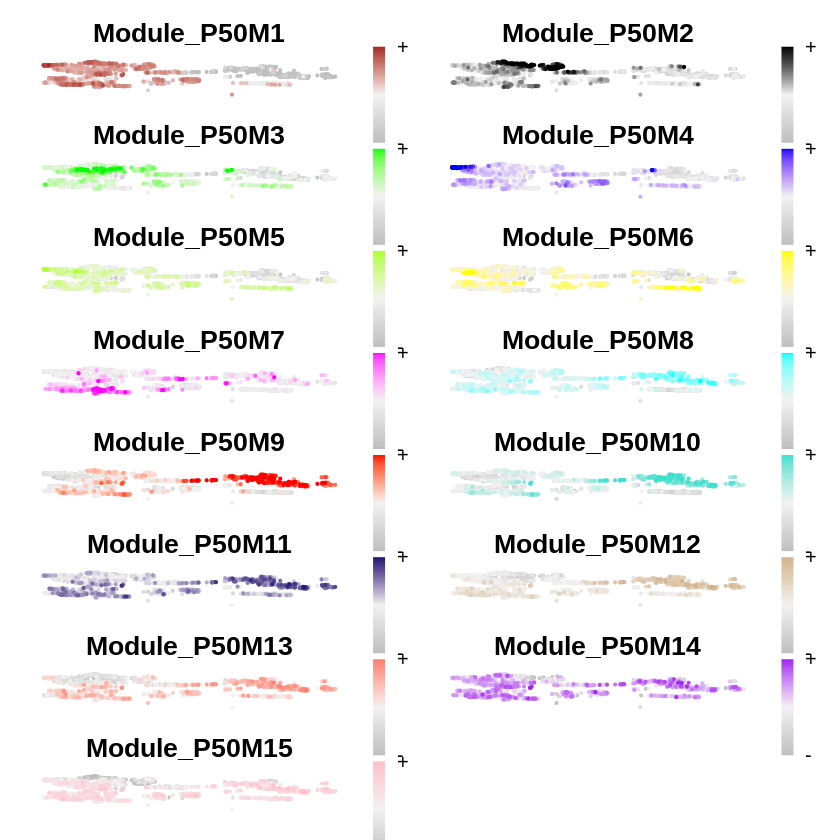

In [6]:
# make a featureplot of hMEs for each module
plot_list <- ModuleFeaturePlot(
  seurat_obj,
  features='MEs', # plot the hMEs or MEs
  order=TRUE # order so the points with highest hMEs are on top
)

# stitch together with patchwork
wrap_plots(plot_list, ncol=2)

In [7]:
# make a featureplot of hub scores for each module
plot_list <- ModuleFeaturePlot(
  seurat_obj,
  features='scores', # plot the hub gene scores
  order='shuffle' # order so cells are shuffled
)
#wrap_plots(plot_list)

[1] "Module_P50M1"
[1] "Module_P50M2"
[1] "Module_P50M3"
[1] "Module_P50M4"
[1] "Module_P50M5"
[1] "Module_P50M6"
[1] "Module_P50M7"
[1] "Module_P50M8"
[1] "Module_P50M9"
[1] "Module_P50M10"
[1] "Module_P50M11"
[1] "Module_P50M12"
[1] "Module_P50M13"
[1] "Module_P50M14"
[1] "Module_P50M15"


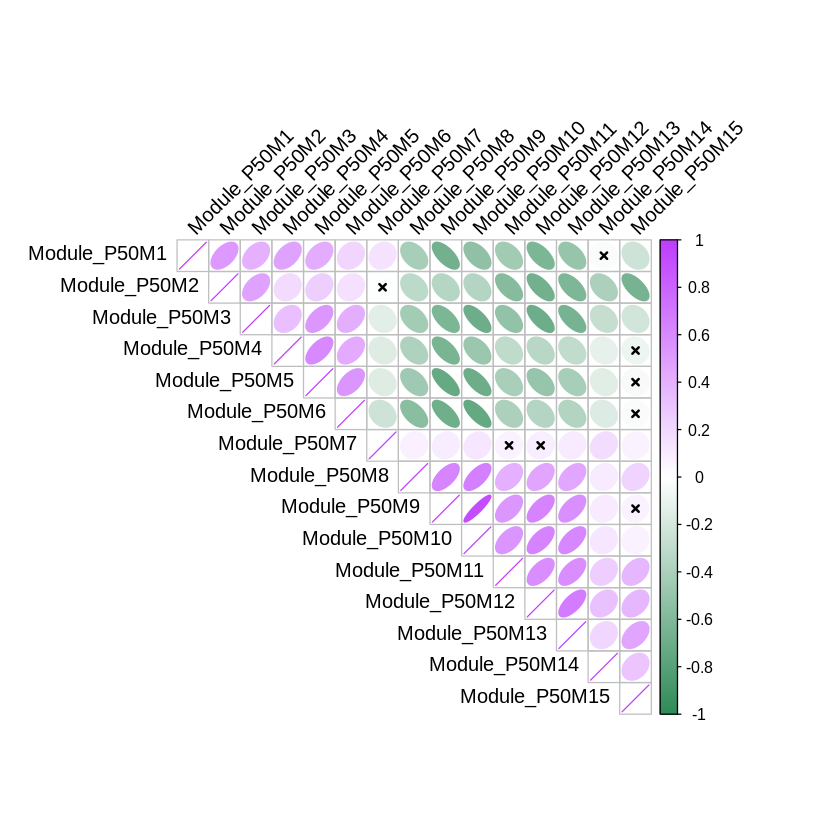

In [8]:
# plot module correlagram
ModuleCorrelogram(seurat_obj)

In [9]:
# use GGally to investigate 6 selected modules:
#GGally::ggpairs(GetMEs(seurat_obj)[,c(1:3,12:15)])

In [10]:
# add hMEs to Seurat meta-data:
seurat_obj@meta.data <- cbind(
  seurat_obj@meta.data,
  GetMEs(seurat_obj, harmonized=FALSE) # TRUE if you have multiple groups
)

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: Module_P50M16, Module_P50M17”


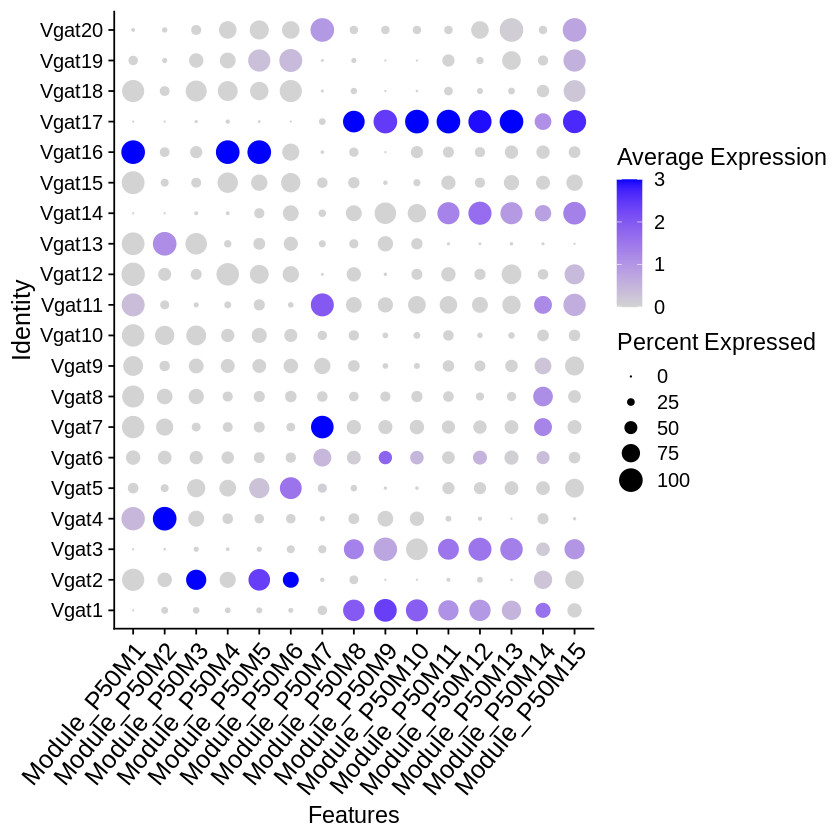

In [39]:
# modules to plot:
selected_mods <- paste0('Module_P50M', c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))

# plot with Seurat's DotPlot function
p <- DotPlot(
    seurat_obj,
    features = selected_mods,
    group.by = 'celltype',
  col.min = 0,col.max = 3
)


# plot output
p+theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12,colour="black"),axis.text.x=element_text(size=15,angle = 50, hjust = 1,colour="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=0.5))#+ylab("diversity_index")
#ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Module expression per clusterM_rev#2com#3.pdf",width=10,height=10)

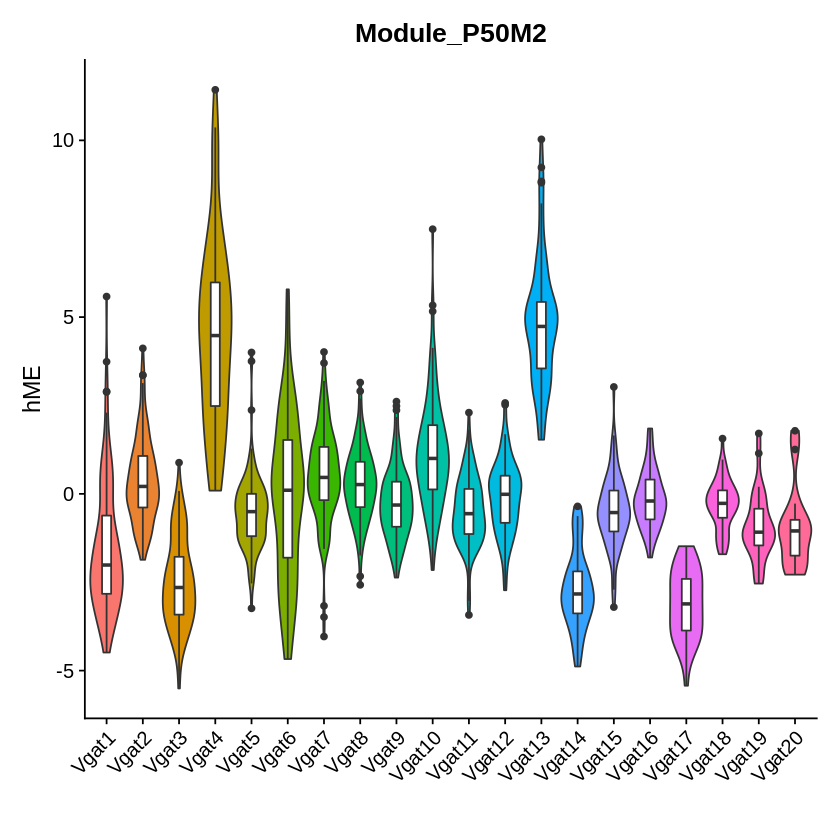

In [101]:
# Plot INH-M4 hME using Seurat VlnPlot function
p <- VlnPlot(
  seurat_obj,
  features = "Module_P50M2",
  group.by = 'celltype',
  pt.size = 0 # don't show actual data points
)

# add box-and-whisker plots on top:
p <- p + geom_boxplot(width=.25, fill='white')

# change axis labels and remove legend:
p <- p + xlab('') + ylab('hME') + NoLegend()

# plot output
p

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



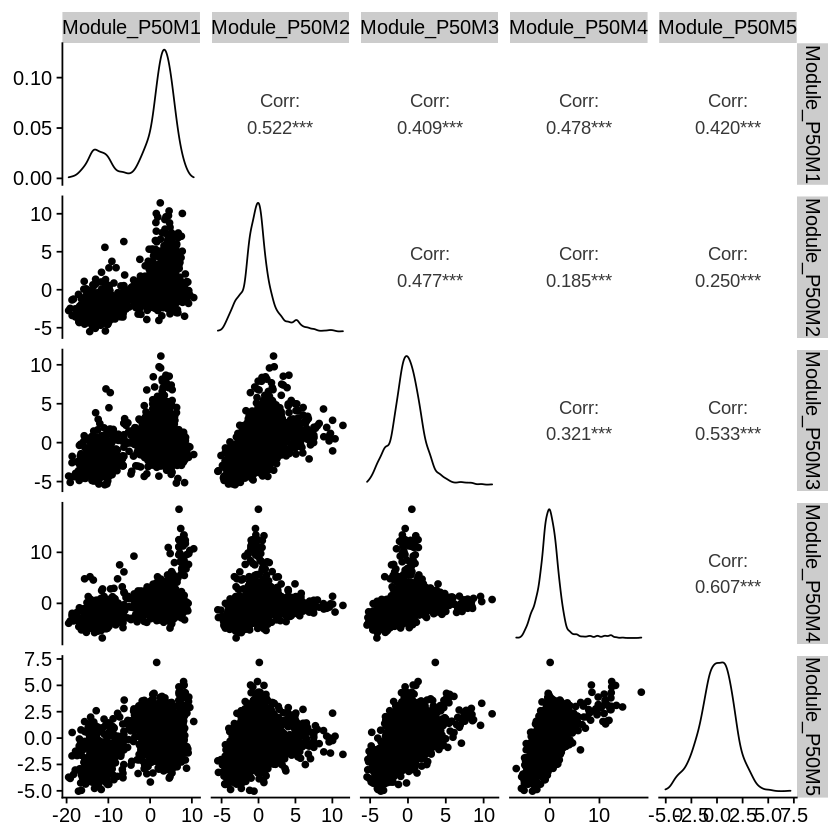

In [102]:
# use GGally to investigate 6 selected modules:
GGally::ggpairs(GetMEs(seurat_obj)[,c(1:5)])

# indivisual module network plot

In [40]:
for(i in 1:dim(seurat_obj@misc$tutorial$wgcna_modules)[1]){
    if(seurat_obj@misc$tutorial$wgcna_modules$module[i] %in% c("Module_P50M1","Module_P50M4","Module_P50M5")){
        seurat_obj@misc$tutorial$wgcna_modules$color[i]<-"darkblue"
    }
}

In [41]:
ModuleNetworkPlot(seurat_obj,  outdir = "NetworkM")

Selecting by kME_Module_P50M1
Selecting by kME_Module_P50M2
Selecting by kME_Module_P50M3
Selecting by kME_Module_P50M4
Selecting by kME_Module_P50M5
Selecting by kME_Module_P50M6
Selecting by kME_Module_P50M7
Selecting by kME_Module_P50M8
Selecting by kME_Module_P50M9
Selecting by kME_Module_P50M10
Selecting by kME_Module_P50M11
Selecting by kME_Module_P50M12
Selecting by kME_Module_P50M13
Selecting by kME_Module_P50M14
Selecting by kME_Module_P50M15


[1] "here"
[1] "Module_P50M1"
 [1] "Rpl35a" "Rpl14"  "Rps14"  "Eef1a1" "Rps27"  "Rps6"   "Rps8"   "Rpl3"  
 [9] "Rpl9"   "Rpl37a" "Rps27a" "Rps19"  "Rps23"  "Rpl10"  "Rps4x"  "Rps3a1"
[17] "Rpl6"   "Rps5"   "Rpl8"   "Rpl13"  "Rpl26"  "Rps29"  "Rpl11"  "Rpl21" 
[25] "Rpl17" 
[1] "here"
[1] 25 25
[1] 25
[1] "Module_P50M2"
 [1] "Selenow" "Ftl1"    "Rorb"    "Hmgb1"   "Uqcrh"   "Dgkb"    "Stmn1"  
 [8] "Hlf"     "Oprk1"   "Ptp4a1"  "Rasgrf2" "Pcsk2"   "Odc1"    "Wfs1"   
[15] "Fbxo10"  "Spint2"  "Hrk"     "Ing2"    "Tmod1"   "Baiap2"  "Prune2" 
[22] "Plcxd3"  "Dbp"     "Elk1"    "Ndrg1"  
[1] "here"
[1] 25 25
[1] 25
[1] "Module_P50M3"
 [1] "Ppp3ca"  "Tspan7"  "Gng2"    "Thra"    "Morf4l2" "Nars"    "Sesn3"  
 [8] "Chd5"    "Ppp1r9a" "Dlx1"    "Olfm1"   "Lypd1"   "Terf2ip" "Nol4"   
[15] "Bub3"    "Tom1l2"  "Ncoa1"   "Kcnh1"   "Cd47"    "Trpc5"   "Prkar2b"
[22] "C1ql3"   "Plcxd2"  "Ankrd6"  "Car10"  
[1] "here"
[1] 25 25
[1] 25
[1] "Module_P50M4"
 [1] "Rplp1"    "Prkacb"   "Rpl36"    "Marck

Selecting by kME_VgatEsr1
Selecting by kME_VgatEsr2
Selecting by kME_VgatEsr3
Selecting by kME_VgatEsr4
Selecting by kME_VgatEsr5



VgatEsr1     grey VgatEsr2 VgatEsr3 VgatEsr4 VgatEsr5 
       8        5        8        8        8        8 
[1] "brown"     "grey90"    "blue"      "yellow"    "turquoise" "green"    
[7] "grey"     
[1] "here"
[1] 348   4


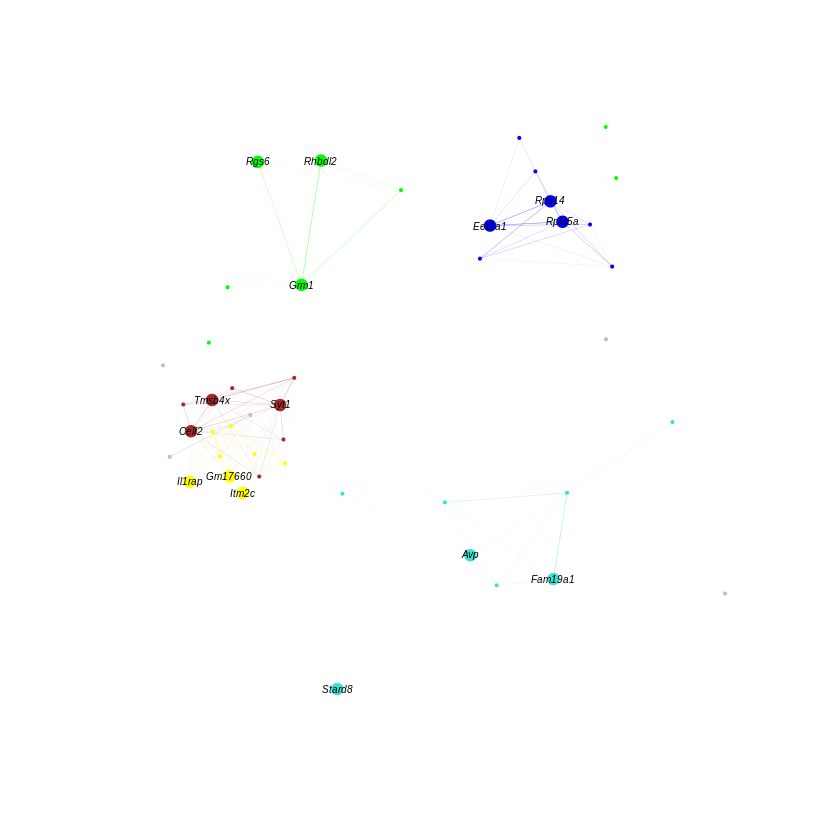

In [306]:
# hubgene network
HubGeneNetworkPlot(
  seurat_obj,
  n_hubs = 3, n_other=5,
  edge_prop = 0.75,
  mods = 'all'
)

# ontology analysis

In [11]:
# enrichr databases to test
dbs <- c('GO_Biological_Process_2021','GO_Cellular_Component_2021','GO_Molecular_Function_2021')



In [12]:
# perform enrichment tests
seurat_obj <- RunEnrichr(
  seurat_obj,
  dbs=dbs, # character vector of enrichr databases to test
  max_genes = 100 # number of genes per module to test
)


Selecting by kME_Module_P50M1


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M2


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M3


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M4


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M5


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M6


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M7


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M8


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M9


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M10


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M11


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M12


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M13


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M14


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


Selecting by kME_Module_P50M15


Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2021... Done.
  Querying GO_Cellular_Component_2021... Done.
  Querying GO_Molecular_Function_2021... Done.
Parsing results... Done.


In [13]:

# retrieve the output table
enrich_df <- GetEnrichrTable(seurat_obj)

In [14]:
# make GO term plots:
EnrichrBarPlot(
  seurat_obj,
  outdir = "enrichr_plotsM", # name of output directory
  n_terms = 10, # number of enriched terms to show (sometimes more show if there are ties!!!)
  plot_size = c(5,7), # width, height of the output .pdfs
  logscale=TRUE # do you want to show the enrichment as a log scale?
)

[1] "Module_P50M1"
[1] "Module_P50M2"
[1] "Module_P50M3"
[1] "Module_P50M4"
[1] "Module_P50M5"
[1] "Module_P50M6"
[1] "Module_P50M7"
[1] "Module_P50M8"
[1] "Module_P50M9"
[1] "Module_P50M10"
[1] "Module_P50M11"
[1] "Module_P50M12"
[1] "Module_P50M13"
[1] "Module_P50M14"
[1] "Module_P50M15"


Warning message in if (mods == "all") {:
“the condition has length > 1 and only the first element will be used”


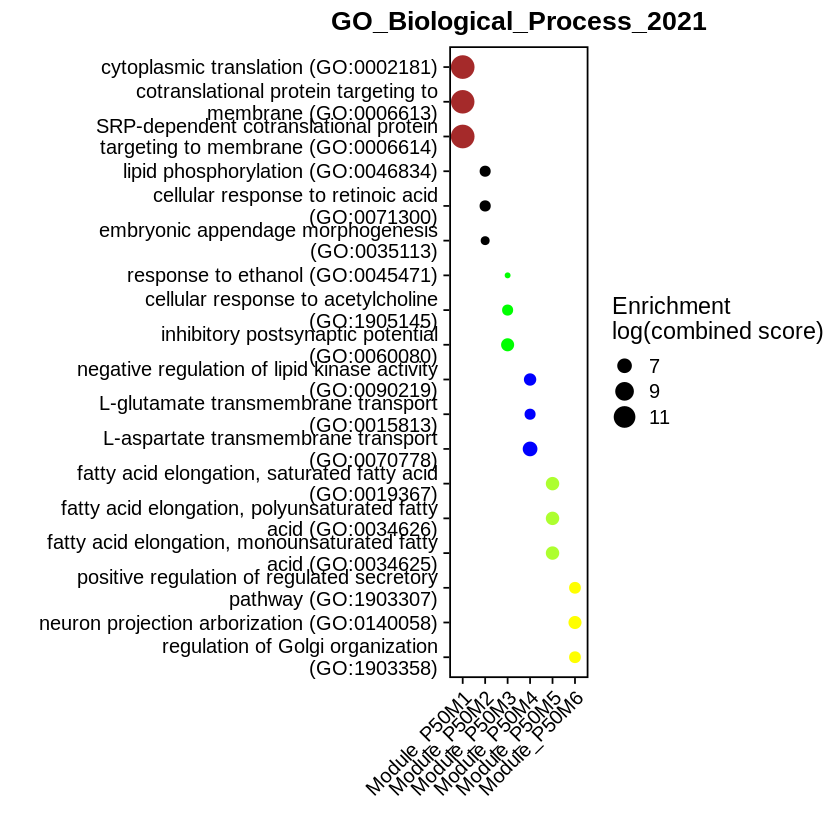

In [108]:
# enrichr dotplot
selected_mods <- paste0('Module_P50M', c(1,2,3,4,5,6))

EnrichrDotPlot(
  seurat_obj,
  mods = selected_mods, # or "all"# use all modules (this is the default behavior)
  database = "GO_Biological_Process_2021", # this has to be one of the lists we used above!!!
  n_terms=3 # number of terms for each module
)
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1_Module Ontology_term_GO_Biological_Process_2021_M_rev#2com#3.pdf",width=8,height=8)

Warning message in if (mods == "all") {:
“the condition has length > 1 and only the first element will be used”


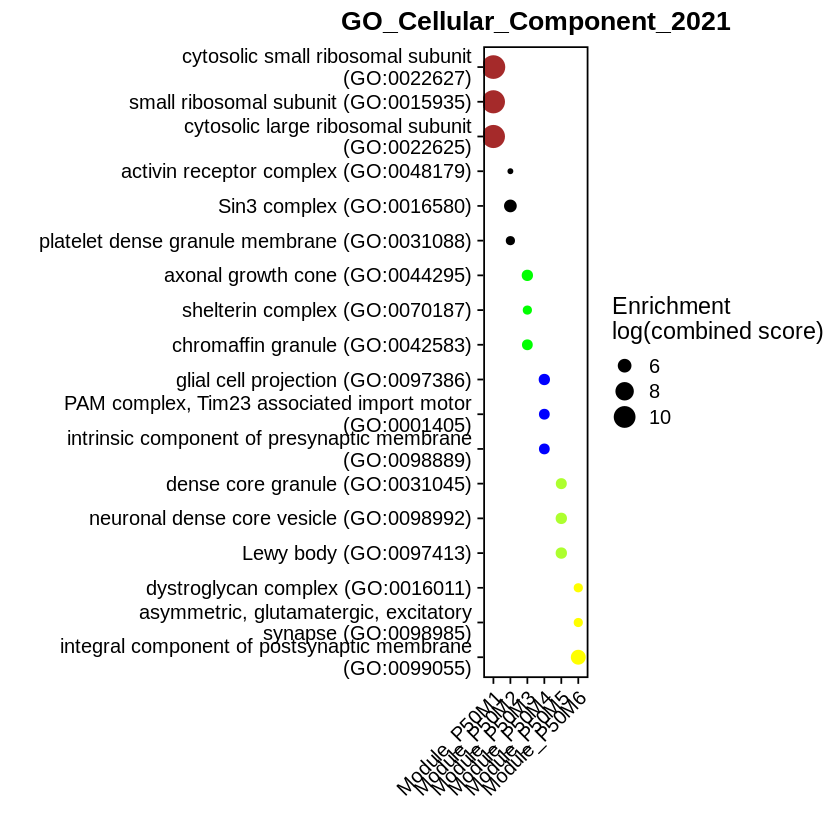

In [109]:
# enrichr dotplot
selected_mods <- paste0('Module_P50M', c(1,2,3,4,5,6))

EnrichrDotPlot(
  seurat_obj,
  mods = selected_mods, # or "all"# use all modules (this is the default behavior)
  database = "GO_Cellular_Component_2021", # this has to be one of the lists we used above!!!
  n_terms=3 # number of terms for each module
)
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1_Module Ontology_term_GO_Cellular_Component_2021_M_rev#2com#3.pdf",width=8,height=8)

Warning message in if (mods == "all") {:
“the condition has length > 1 and only the first element will be used”


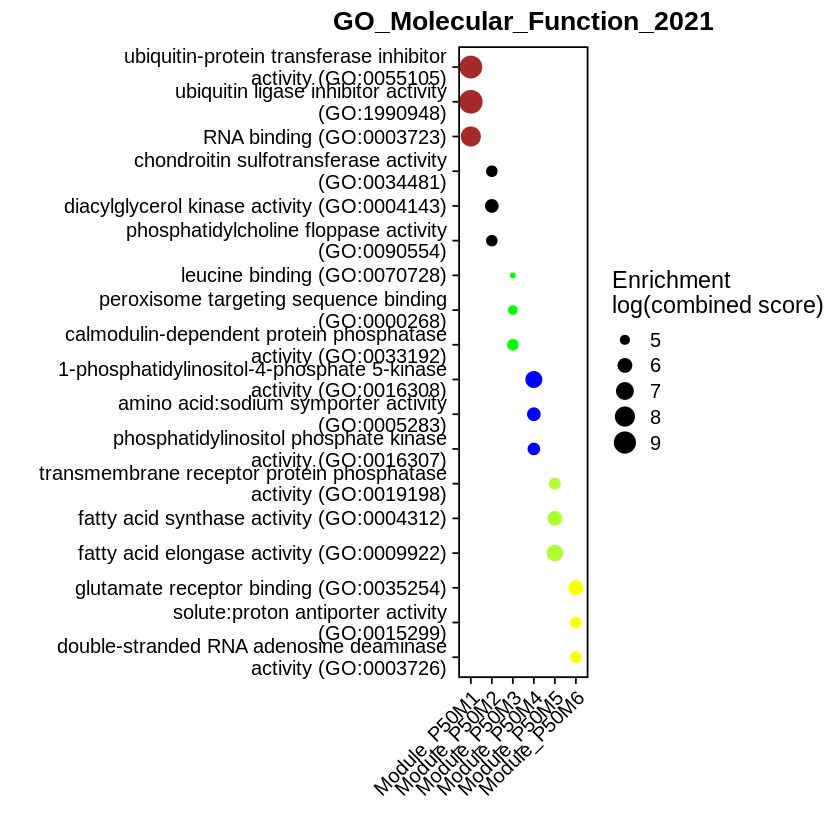

In [15]:
# enrichr dotplot
selected_mods <- paste0('Module_P50M', c(1,2,3,4,5,6))

EnrichrDotPlot(
  seurat_obj,
  mods = selected_mods, # or "all"# use all modules (this is the default behavior)
  database = "GO_Molecular_Function_2021", # this has to be one of the lists we used above!!!
  n_terms=3 # number of terms for each module
)
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/Esr1_Module Ontology_term_GO_Molecular_Function_2021_M_rev#2com#3.pdf",width=8,height=8)